In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import plotly.express as px
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
df = pd.read_csv("tips.csv")
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [13]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [15]:
value_cnt_norm_cal(df,'sex')

,Count,Frequency (%)
Male,157,64.344262
Female,87,35.655738


In [16]:
value_cnt_norm_cal(df,'smoker')

,Count,Frequency (%)
No,151,61.885246
Yes,93,38.114754


Non Smokers are just over 60%

In [17]:
value_cnt_norm_cal(df,'time') 

,Count,Frequency (%)
Dinner,176,72.131148
Lunch,68,27.868852


Most people had dinner at the restaurant. 
This could be due to numerous reasons like kids finishing their day at school and adults completing their work

In [18]:
df.groupby('sex').aggregate(['min', np.median, max,np.mean])


C:\Users\tejaj\AppData\Local\Temp\ipykernel_21636\3087331429.py:1: FutureWarning:

['smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



total_bill                           tip                        size  \
              min median    max       mean  min median   max      mean  min   
sex                                                                           
Female       3.07  16.40  44.30  18.056897  1.0   2.75   6.5  2.833448    1   
Male         7.25  18.35  50.81  20.744076  1.0   3.00  10.0  3.089618    1   

                             
       median max      mean  
sex                          
Female    2.0   6  2.459770  
Male      2.0   6  2.630573

Both genders paid the same minimum tip. However there is a considerable gap as the median suggests and this gap widens according to highest tip given

In [19]:
df.groupby('smoker').aggregate(['min', np.median, max,np.mean])

C:\Users\tejaj\AppData\Local\Temp\ipykernel_21636\1442984386.py:1: FutureWarning:

['sex', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



total_bill                           tip                        size  \
              min median    max       mean  min median   max      mean  min   
smoker                                                                        
No           7.25  17.59  48.33  19.188278  1.0   2.74   9.0  2.991854    1   
Yes          3.07  17.92  50.81  20.756344  1.0   3.00  10.0  3.008710    1   

                             
       median max      mean  
smoker                       
No        2.0   6  2.668874  
Yes       2.0   5  2.408602

Although smokers given more tip, the gap is less

In [20]:
df.groupby('time').aggregate(['min', np.median, max,np.mean])

C:\Users\tejaj\AppData\Local\Temp\ipykernel_21636\2601760029.py:1: FutureWarning:

['sex', 'smoker', 'day'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



total_bill                             tip                        size  \
              min  median    max       mean   min median   max      mean  min   
time                                                                            
Dinner       3.07  18.390  50.81  20.797159  1.00   3.00  10.0  3.102670    1   
Lunch        7.51  15.965  43.11  17.168676  1.25   2.25   6.7  2.728088    1   

                             
       median max      mean  
time                         
Dinner    2.0   6  2.630682  
Lunch     2.0   6  2.411765

Waiters can expect high and more tips during dinner. 

In [21]:
df.groupby('day').aggregate(['min', np.median, max,np.mean])

C:\Users\tejaj\AppData\Local\Temp\ipykernel_21636\2934435962.py:1: FutureWarning:

['sex', 'smoker', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



total_bill                            tip                         size  \
            min median    max       mean   min median    max      mean  min   
day                                                                           
Fri        5.75  15.38  40.17  17.151579  1.00  3.000   4.73  2.734737    1   
Sat        3.07  18.24  50.81  20.441379  1.00  2.750  10.00  2.993103    1   
Sun        7.25  19.63  48.17  21.410000  1.01  3.150   6.50  3.255132    2   
Thur       7.51  16.20  43.11  17.682742  1.25  2.305   6.70  2.771452    1   

                           
     median max      mean  
day                        
Fri     2.0   4  2.105263  
Sat     2.0   5  2.517241  
Sun     2.0   6  2.842105  
Thur    2.0   6  2.451613

While the average tip given has slight difference between thursday and friday. Saturday and Sunday have considerably higher average tips. This could be due to weekend factor as more customers visit the restaurant as evidenced by high mean, high minimum family size on sunday and highest family size recorded on sunday followed by saturday. Thursday too has experienced big families however, the average tip paid is less than friday.

In [22]:
df.groupby('size').aggregate(['min', np.median, max,np.mean])

C:\Users\tejaj\AppData\Local\Temp\ipykernel_21636\2409026040.py:1: FutureWarning:

['sex', 'smoker', 'day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



total_bill                             tip                        
            min  median    max       mean   min median    max      mean
size                                                                   
1          3.07   7.915  10.07   7.242500  1.00  1.415   1.92  1.437500
2          5.75  15.370  40.55  16.448013  1.00  2.500   5.85  2.582308
3         10.33  20.365  50.81  23.277632  1.36  3.290  10.00  3.393158
4         16.49  25.890  48.33  28.613514  2.00  3.760   9.00  4.135405
5         20.69  29.850  41.19  30.068000  2.00  5.000   5.14  4.028000
6         27.05  32.050  48.17  34.830000  4.20  5.000   6.70  5.225000

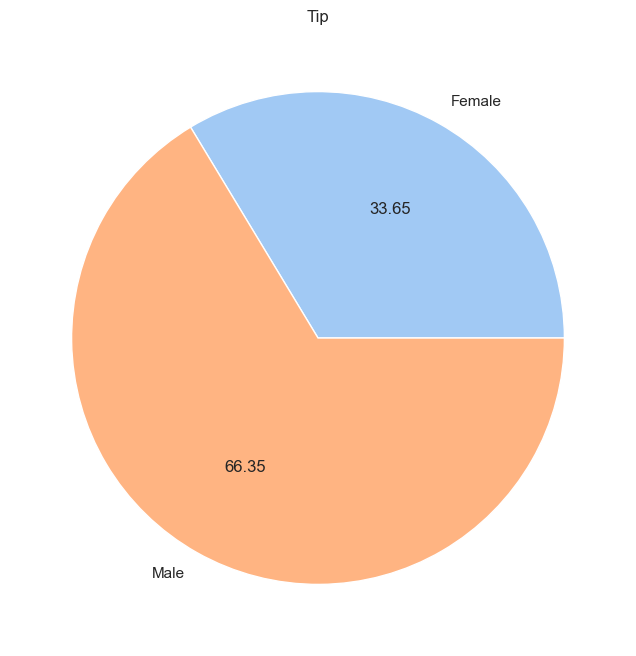

In [23]:
sextip = df.groupby('sex')[["tip"]].sum()
sextipsorted = sextip['tip'].astype('int64') 
plt.figure(figsize =(8,8))
plt.title('Tip')
plt.pie(sextipsorted, autopct='%.2f',labels = sextipsorted.index)
plt.show()

Males have paid more tips than females

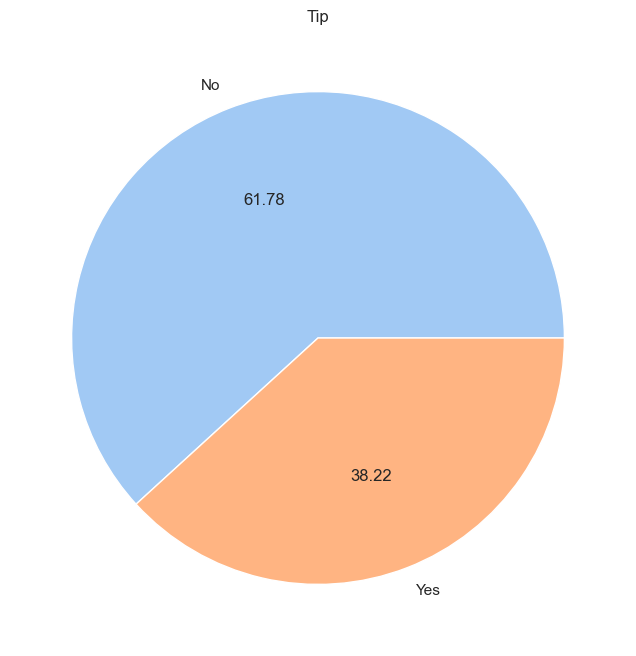

In [24]:
smokertip = df.groupby('smoker')[["tip"]].sum()
smokertipsorted = smokertip['tip'].astype('int64') 
plt.figure(figsize =(8,8))
plt.title('Tip')
plt.pie(smokertipsorted, autopct='%.2f',labels = smokertipsorted.index)
plt.show()

Non smokers have paid more tips

In [25]:
figure = px.pie(df, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

Waiters received more tips during weekends

In [26]:
figure = px.pie(df, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

Waiters received more tips during dinner. This could be due to more customers during dinner times.

In [27]:
figure = px.scatter(data_frame = df, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [28]:
figure = px.scatter(data_frame = df, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

In [29]:
figure = px.scatter(data_frame = df, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

High correlation between total bill and tip given suggests that tip will be high if the bill is high. This could be due to customers want to tip depending on the bill.

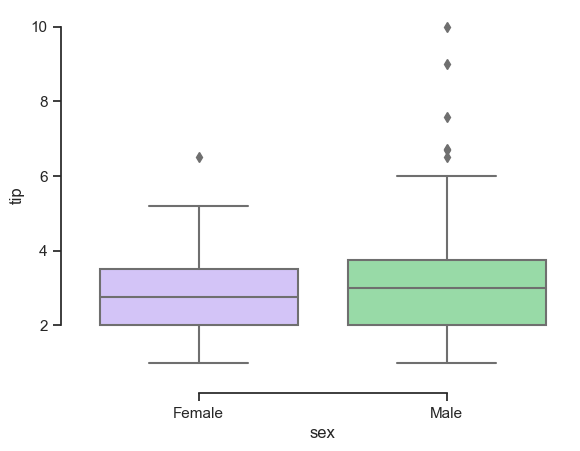

In [30]:
sns.boxplot(x="sex", y="tip", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

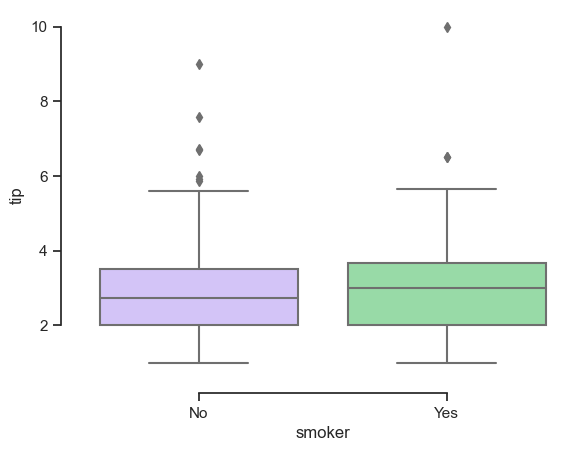

In [31]:
sns.boxplot(x="smoker", y="tip", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

Further analysis has been visualised to assess the tip.

In [32]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [33]:
df.corr(method ='spearman')

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.678968,0.147717,0.061101,0.195085,0.208096,0.604791
tip,0.678968,1.000000,0.055982,0.016984,0.178553,0.140286,0.468268
sex,0.147717,0.055982,1.000000,0.002816,0.227545,0.205231,0.096021
smoker,0.061101,0.016984,0.002816,1.000000,-0.075894,0.054921,-0.129651
day,0.195085,0.178553,0.227545,-0.075894,1.000000,0.804326,0.235459
time,0.208096,0.140286,0.205231,0.054921,0.804326,1.000000,0.164948
size,0.604791,0.468268,0.096021,-0.129651,0.235459,0.164948,1.000000


In [34]:
x = df[["total_bill", "sex", "smoker", "day", 
                   "time", "size"]]
y = df["tip"]

In [35]:
from scipy.stats import shapiro
shapiro(df[['total_bill']])

ShapiroResult(statistic=0.9197186231613159, pvalue=3.3244529351605934e-10)

In [36]:
shapiro(df[['tip']])

ShapiroResult(statistic=0.8978114128112793, pvalue=8.200817629144819e-12)

Negligible p value at 99% for both tip and total bill infers that null hypothesis can be rejected and the data is not normally dstributed.

Linear regression model has been implemented for prediction.

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [39]:
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

C:\Users\tejaj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3.54335633])

In [40]:
ypredicted = model.predict(xtest)

In [41]:
from sklearn import metrics
mae = metrics.mean_absolute_error(ytest, ypredicted)
mse = metrics.mean_squared_error(ytest, ypredicted)
r2 = metrics.r2_score(ytest, ypredicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.661911618248884
MSE is 0.8365584111683395
R2 score is 0.5830897914069042


In [42]:
from sklearn.metrics import mean_absolute_error
import lazypredict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=mean_absolute_error)
models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)

print(models.to_markdown())

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  8.36it/s]

| Model                         |   Adjusted R-Squared |      R-Squared |      RMSE |   Time Taken |   mean_absolute_error |
|:------------------------------|---------------------:|---------------:|----------:|-------------:|----------------------:|
| RANSACRegressor               |            0.629766  |     0.676045   |  0.806249 |    0.110714  |              0.597574 |
| AdaBoostRegressor             |            0.555365  |     0.610945   |  0.883553 |    0.126961  |              0.672593 |
| OrthogonalMatchingPursuitCV   |            0.532217  |     0.59069    |  0.906261 |    0.0472062 |              0.656407 |
| OrthogonalMatchingPursuit     |            0.532217  |     0.59069    |  0.906261 |    0.0158379 |              0.656407 |
| GradientBoostingRegressor     |            0.529278  |     0.588118   |  0.909103 |    0.0907381 |              0.696391 |
| TransformedTargetRegressor    |            0.523531  |     0.58309    |  0.914636 |    0.0319672 |              0.661912 |


Lazy predict has been implemented to identify the best model and RANSAC regressor has the highest adjusted r squared. It also has the lowest RMSE and MAE. RANSAC regressor is a better fir compared to linear regression.